In [11]:
import pandas as pd 
vdata = pd.read_csv("2021VAERSDATA.csv.gz", encoding="iso-8859-1", low_memory=False)
vdata.columns
vdata.dtypes
vdata.shape

vdata.iloc[0]
vdata = vdata.set_index("VAERS_ID")
vdata.loc[916600]
vdata.head(3)
vdata.iloc[:3]
vdata.iloc[:5, 2:4]


,AGE_YRS,CAGE_YR
VAERS_ID,,
916600,33.0,33.0
916601,73.0,73.0
916602,23.0,23.0
916603,58.0,58.0
916604,47.0,47.0


In [ ]:
vdata["AGE_YRS"].max()
vdata.AGE_YRS.max()

In [13]:
vdata["AGE_YRS"].sort_values().plot(use_index=False)
vdata["AGE_YRS"].plot.hist(bins=20)



SyntaxError: invalid syntax (4067291235.py, line 3)

In [16]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 7.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.6 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Frequency'>

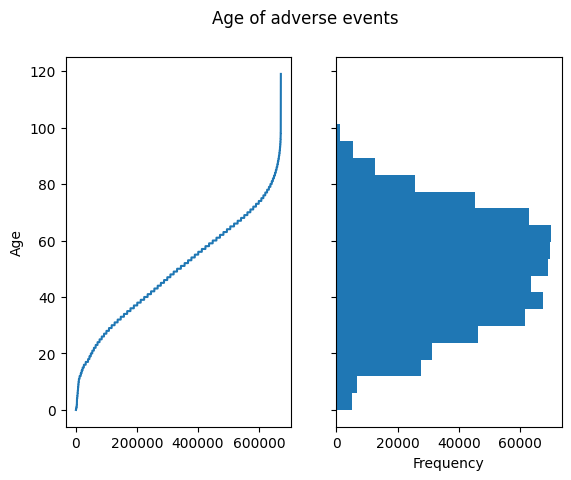

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle("Age of adverse events")
vdata["AGE_YRS"].sort_values().plot(
use_index=False, ax=ax[0],
xlabel="Obervation", ylabel="Age")
vdata["AGE_YRS"].plot.hist(bins=20,
orientation="horizontal")


In [20]:
vdata.DIED.value_counts(dropna=False)
vdata["is_dead"] = (vdata.DIED == "Y")

In [21]:
dead = vdata[vdata.is_dead]
vax = pd.read_csv("2021VAERSVAX.csv.gz",
encoding="iso-8859-1").set_index("VAERS_ID")
vax.groupby("VAX_TYPE").size().sort_values()
vax19 = vax[vax.VAX_TYPE == "COVID19"]
vax19_dead = dead.join(vax19)